In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

In [2]:
Jianing_FLT = pd.read_excel('Jianing_FLT.xlsx')
# Set the index
Jianing_FLT.set_index('Date', inplace=True) 

In [3]:
Jianing_FLT.index

DatetimeIndex(['2020-12-31 15:00:00', '2020-12-31 16:00:00',
               '2020-12-31 17:00:00', '2020-12-31 18:00:00',
               '2020-12-31 19:00:00', '2020-12-31 20:00:00',
               '2020-12-31 21:00:00', '2020-12-31 22:00:00',
               '2020-12-31 23:00:00', '2021-01-01 00:00:00',
               ...
               '2023-12-30 00:00:00', '2023-12-30 01:00:00',
               '2023-12-30 02:00:00', '2023-12-30 03:00:00',
               '2023-12-30 04:00:00', '2023-12-30 05:00:00',
               '2023-12-30 06:00:00', '2023-12-30 07:00:00',
               '2023-12-30 08:00:00', '2023-12-30 09:00:00'],
              dtype='datetime64[ns]', name='Date', length=26251, freq=None)

In [4]:
# Check the shape of the dataset
Jianing_FLT.shape 

(26251, 1)

In [5]:
# Filling missing values with forward fill method
Jianing_FLT.interpolate(method='linear', inplace=True)


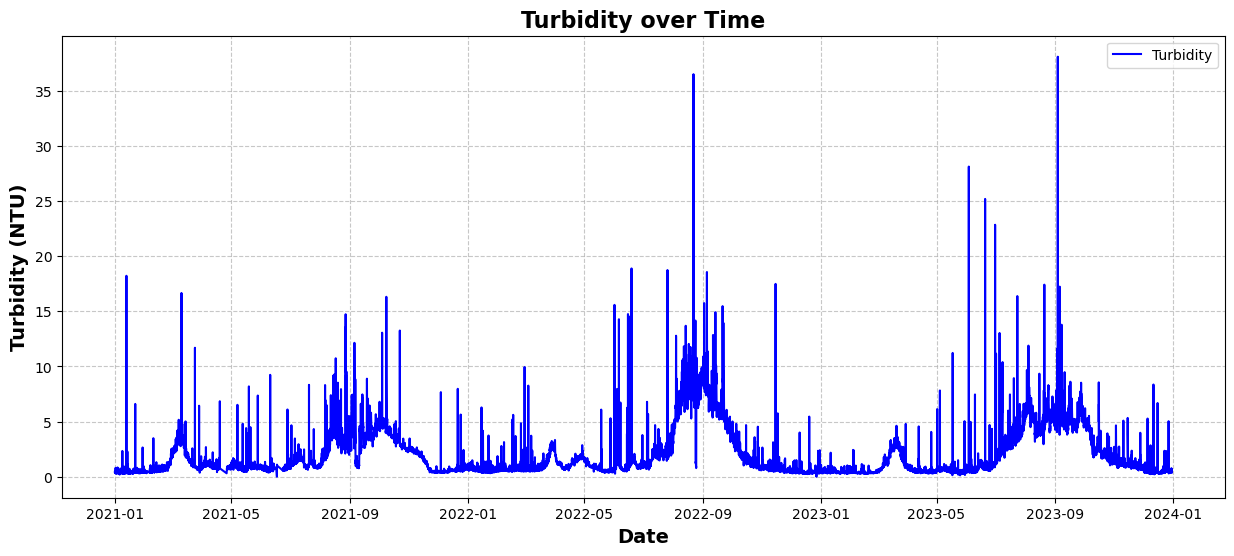

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(Jianing_FLT.index, Jianing_FLT['Turbidity'], label ='Turbidity', color='blue')
plt.title('Turbidity over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')  
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_18600\1875933691.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(Jianing_FLT['Turbidity'].resample('M').mean())


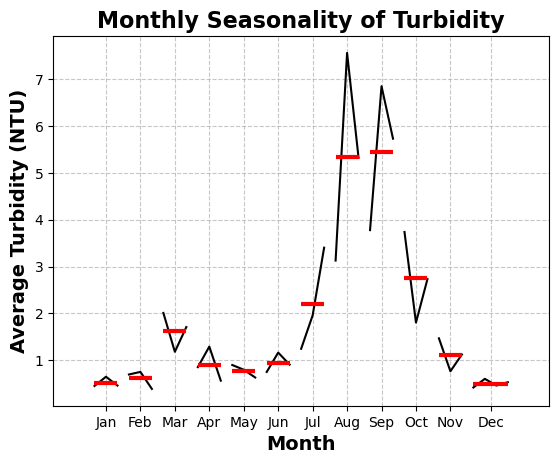

In [7]:

month_plot(Jianing_FLT['Turbidity'].resample('M').mean())
plt.title('Monthly Seasonality of Turbidity', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Average Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_18600\4010990290.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(Jianing_FLT['Turbidity'].resample('Q').mean())


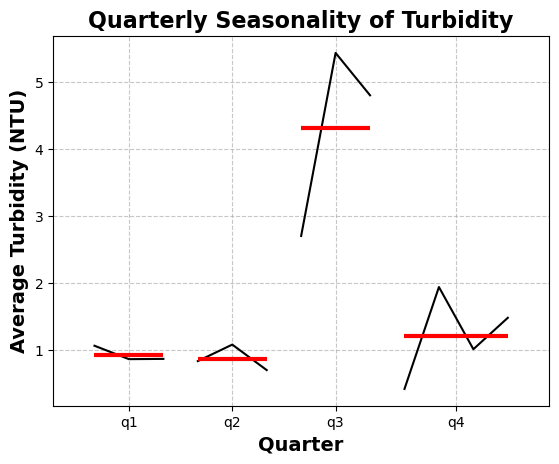

In [8]:
quarter_plot(Jianing_FLT['Turbidity'].resample('Q').mean())
plt.title('Quarterly Seasonality of Turbidity', fontsize=16, fontweight='bold')
plt.xlabel('Quarter', fontsize=14, fontweight='bold')
plt.ylabel('Average Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Decomposition

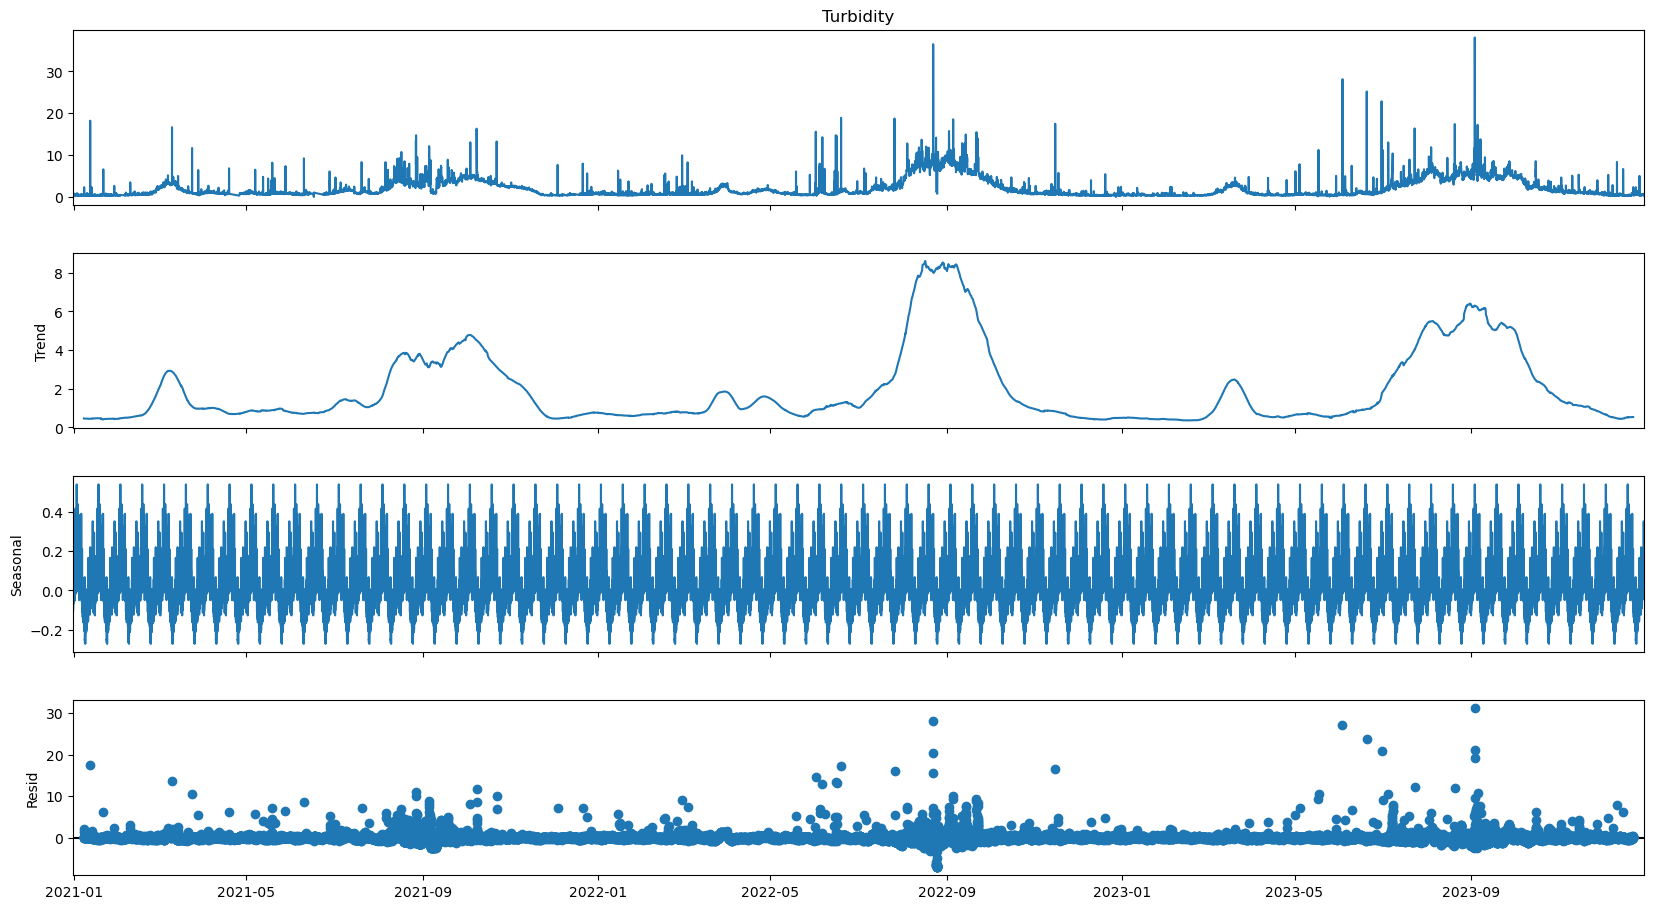

In [9]:
# decomposition
decomposition = seasonal_decompose(Jianing_FLT['Turbidity'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(18, 10)
plt.show()




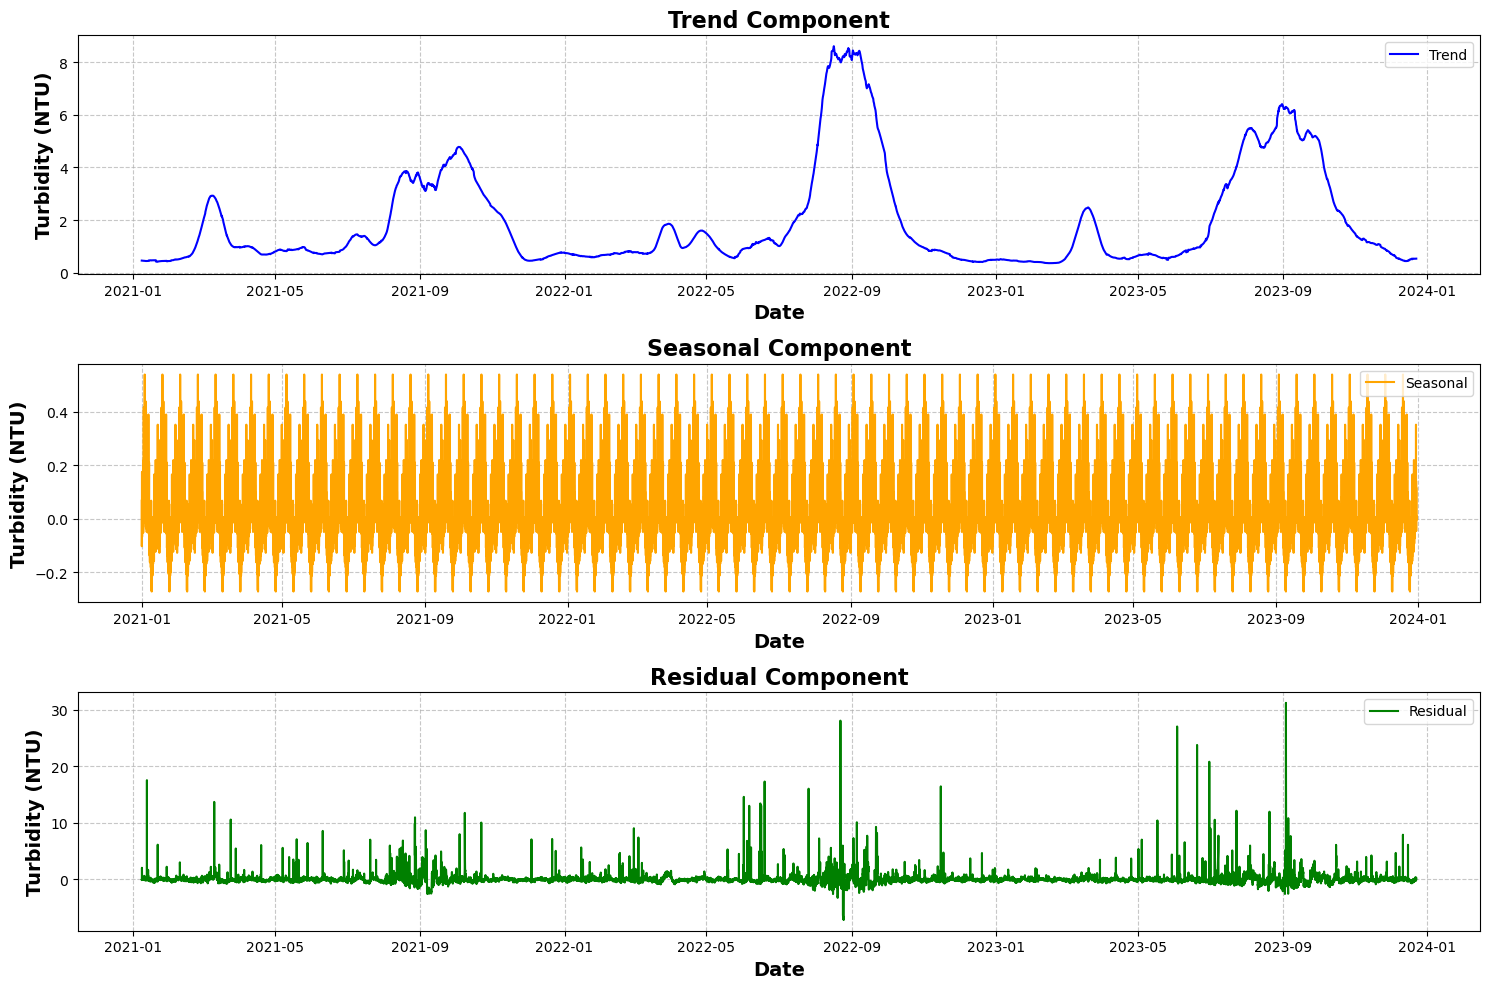

In [10]:
# Plot the trend, seasonal, and residual components
plt.figure(figsize=(15, 10))
plt.subplot(311)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.title('Trend Component', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonal', color='orange')
plt.title('Seasonal Component', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(313)
plt.plot(decomposition.resid, label='Residual', color='green')
plt.title('Residual Component', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Descriptive statistics

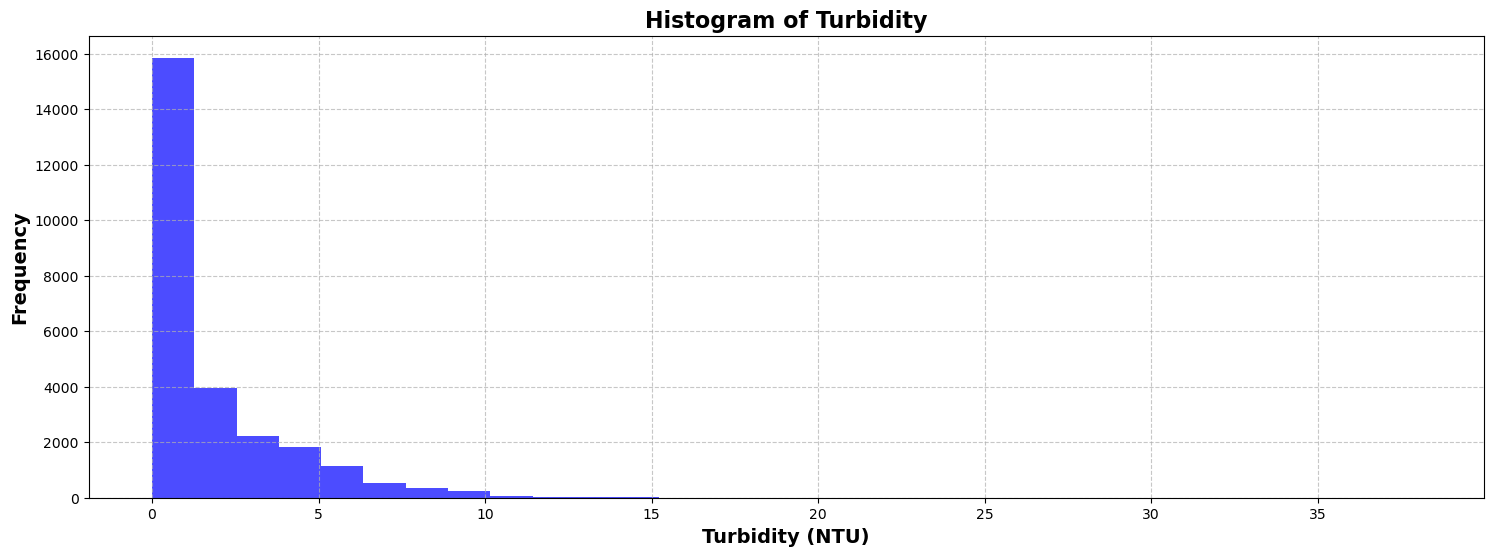

In [11]:
# Histogram of Turbidity
plt.figure(figsize=(18, 6))
plt.hist(Jianing_FLT['Turbidity'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Turbidity', fontsize=16, fontweight='bold')
plt.xlabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



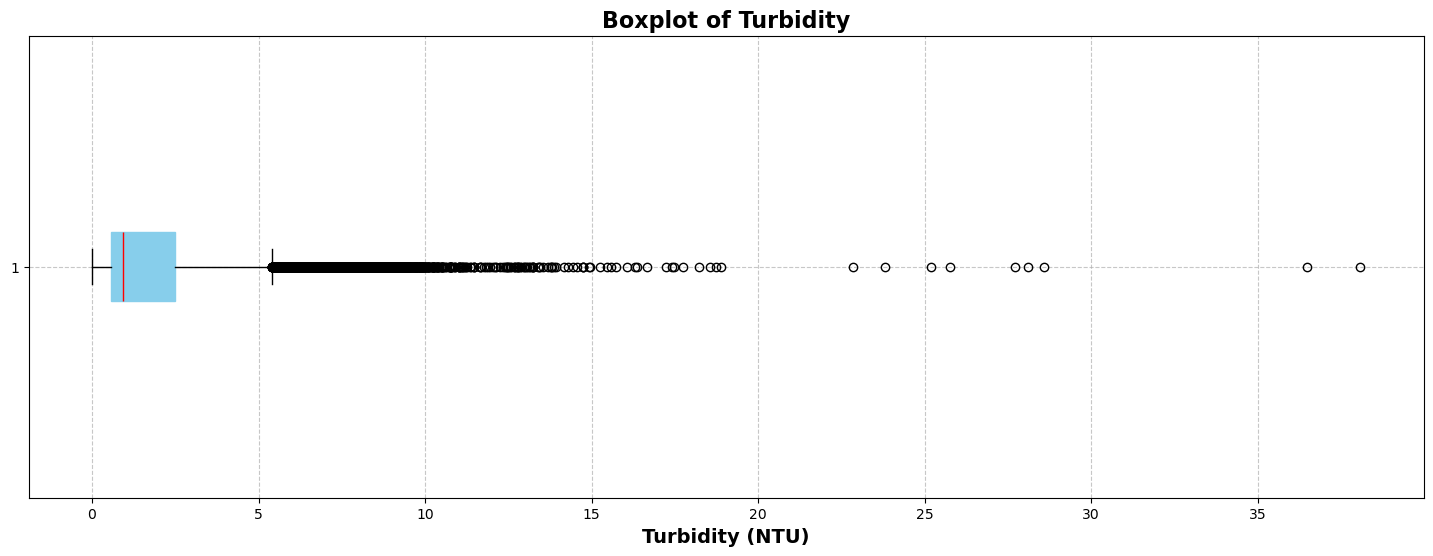

In [12]:
# Boxplot of Turbidity
plt.figure(figsize=(18, 6))
plt.boxplot(Jianing_FLT['Turbidity'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='skyblue'), medianprops=dict(color='red'))
plt.title('Boxplot of Turbidity', fontsize=16, fontweight='bold')
plt.xlabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



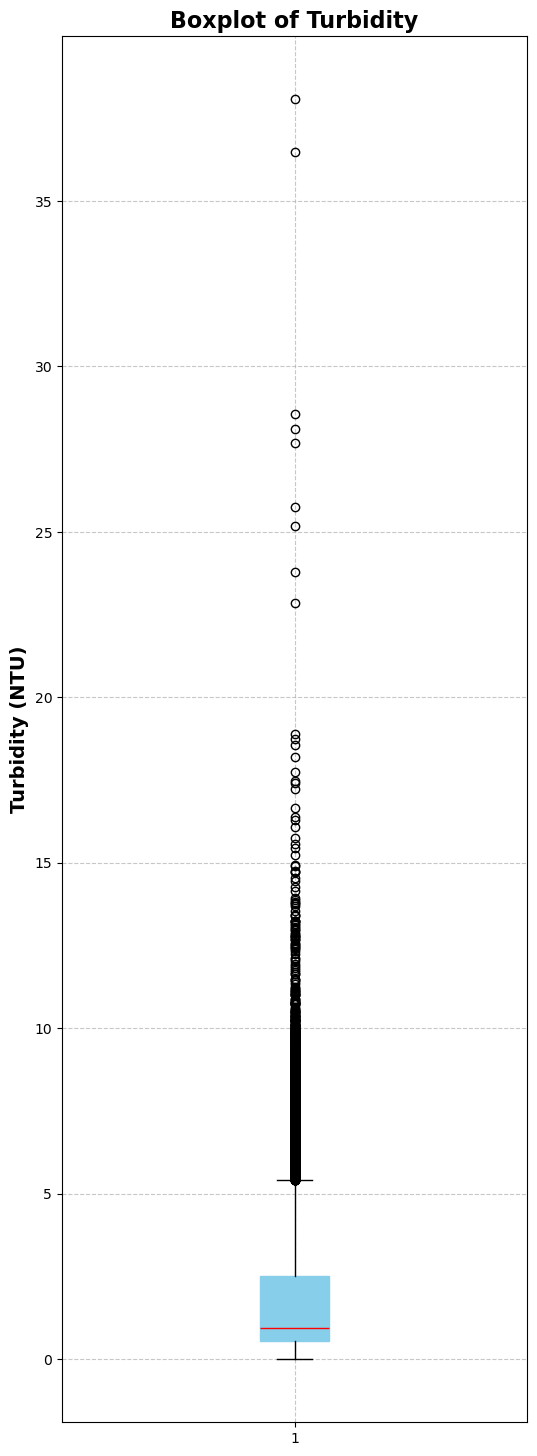

In [13]:
# Boxplot of Turbidity vertically
plt.figure(figsize=(6, 18))
plt.boxplot(Jianing_FLT['Turbidity'], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue', color='skyblue'), medianprops=dict(color='red'))
plt.title('Boxplot of Turbidity', fontsize=16, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


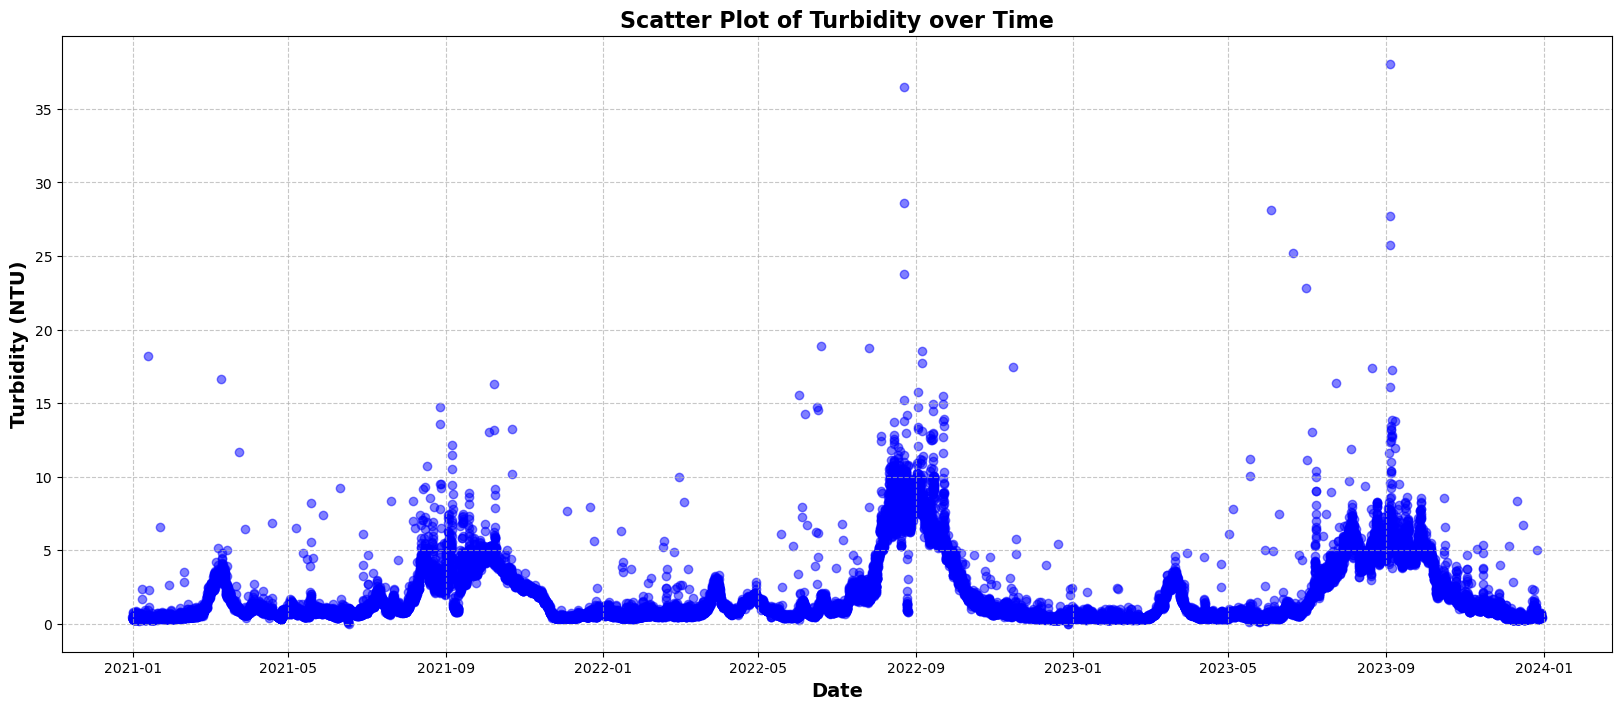

In [14]:
# Scatter plot of Turbidity over time
plt.figure(figsize=(20, 8))
plt.scatter(Jianing_FLT.index, Jianing_FLT['Turbidity'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Turbidity over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Anomaly

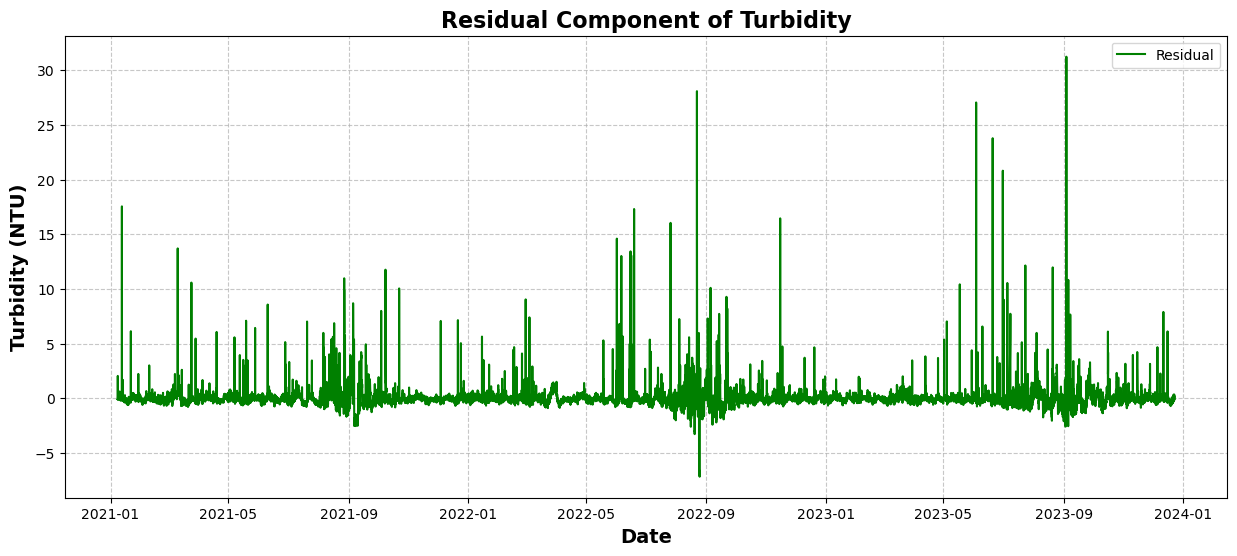

In [47]:
# PLot the residual component of Jianing_FLT
plt.figure(figsize=(15, 6))
plt.plot(decomposition.resid, label='Residual', color='green')
plt.title('Residual Component of Turbidity', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


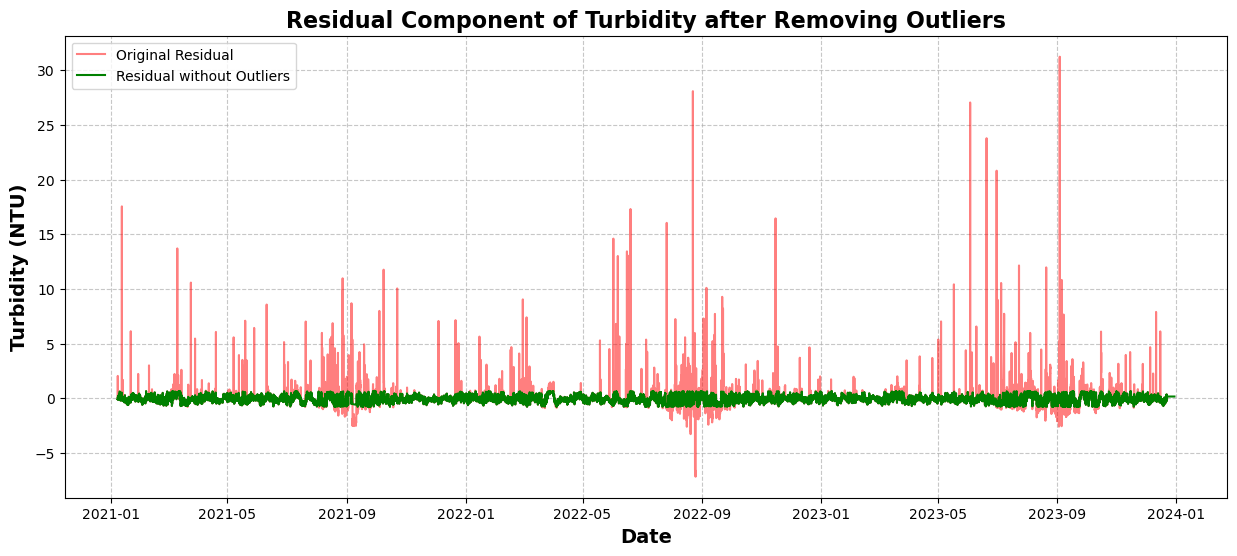

In [54]:
# remove the outliers from the residual component using IQR method
Q1 = decomposition.resid.quantile(0.25)
Q3 = decomposition.resid.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = decomposition.resid[(decomposition.resid < lower_bound) | (decomposition.resid > upper_bound)]

# Remove the outliers from the residual component
residuals_without_outliers = decomposition.resid.copy()
residuals_without_outliers[(decomposition.resid < lower_bound) | (decomposition.resid > upper_bound)] = np.nan
residuals_without_outliers.interpolate(method='linear', inplace=True)


# Plot the residual component after removing outliers vs the original residual component
plt.figure(figsize=(15, 6))
plt.plot(decomposition.resid, label='Original Residual', color='red', alpha=0.5)
plt.plot(residuals_without_outliers, label='Residual without Outliers', color='green')
plt.title('Residual Component of Turbidity after Removing Outliers', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



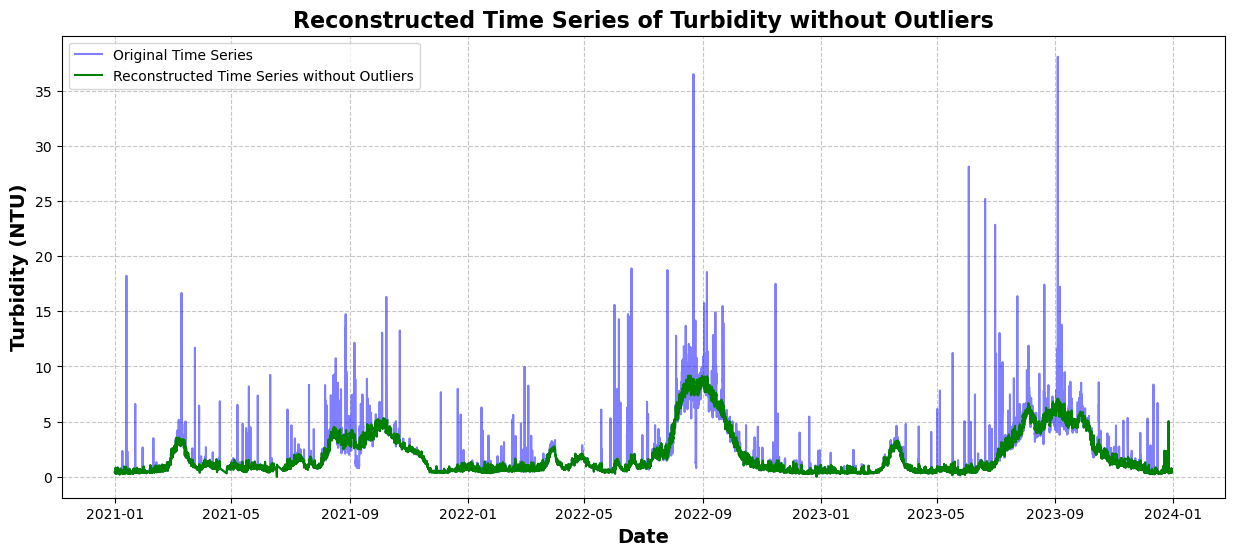

In [67]:
# Reconstruct the time series without outliers
reconstructed_series = decomposition.trend + decomposition.seasonal + residuals_without_outliers
# Fill NaN values in the reconstructed series with the original series
reconstructed_series.fillna(Jianing_FLT['Turbidity'], inplace=True)

# Plot the reconstructed time series without outliers vs the original time series
plt.figure(figsize=(15, 6))
plt.plot(Jianing_FLT['Turbidity'], label='Original Time Series', color='blue', alpha=0.5)
plt.plot(reconstructed_series, label='Reconstructed Time Series without Outliers', color='green')
plt.title('Reconstructed Time Series of Turbidity without Outliers', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



# save the reconstructed series to a new Excel file and the column name as 'Reconstructed_Turbidity'
# reconstructed_series = pd.DataFrame(reconstructed_series, columns=['Reconstructed_Turbidity'])
# reconstructed_series.to_excel('Reconstructed_Turbidity.xlsx', index=True, header=True)





C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_18600\3043330353.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Jianing_FLT_without_outliers['Turbidity'][(Jianing_FLT['Turbidity'] < lower_bound) | (Jianing_FLT['Turbidity'] > upper_bo

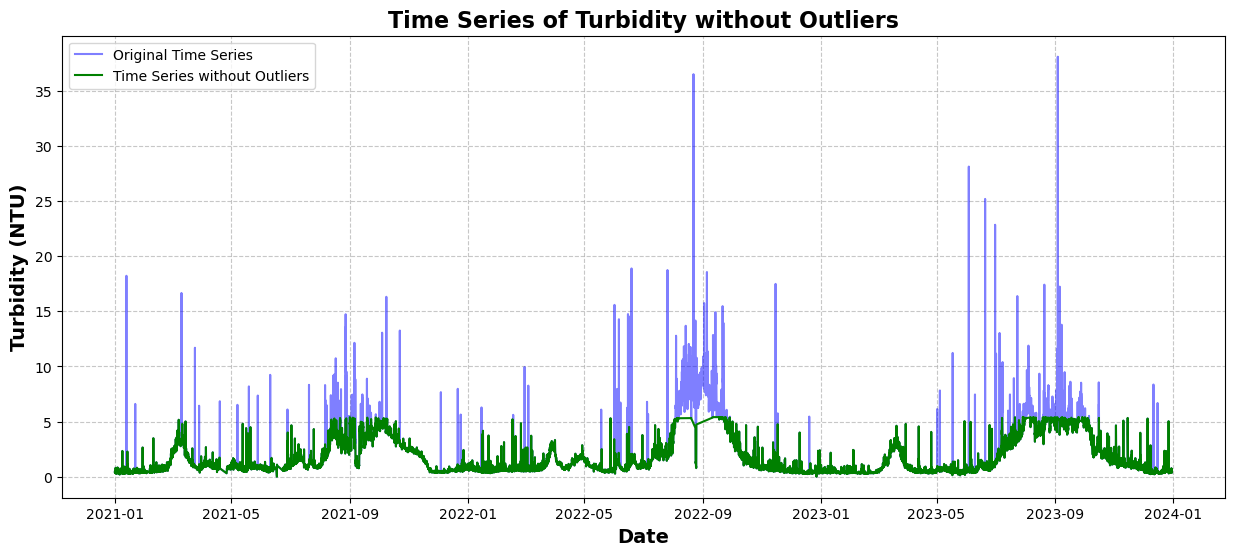

In [69]:
# remove the outliers from the original time series using IQR method
Q1 = Jianing_FLT['Turbidity'].quantile(0.25)
Q3 = Jianing_FLT['Turbidity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = Jianing_FLT['Turbidity'][(Jianing_FLT['Turbidity'] < lower_bound) | (Jianing_FLT['Turbidity'] > upper_bound)]

# Remove the outliers from the original time series
Jianing_FLT_without_outliers = Jianing_FLT.copy()
Jianing_FLT_without_outliers['Turbidity'][(Jianing_FLT['Turbidity'] < lower_bound) | (Jianing_FLT['Turbidity'] > upper_bound)] = np.nan
Jianing_FLT_without_outliers.interpolate(method='linear', inplace=True)

# Plot the original time series vs the time series without outliers
plt.figure(figsize=(15, 6))
plt.plot(Jianing_FLT['Turbidity'], label='Original Time Series', color='blue', alpha=0.5)
plt.plot(Jianing_FLT_without_outliers['Turbidity'], label='Time Series without Outliers', color='green')
plt.title('Time Series of Turbidity without Outliers', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


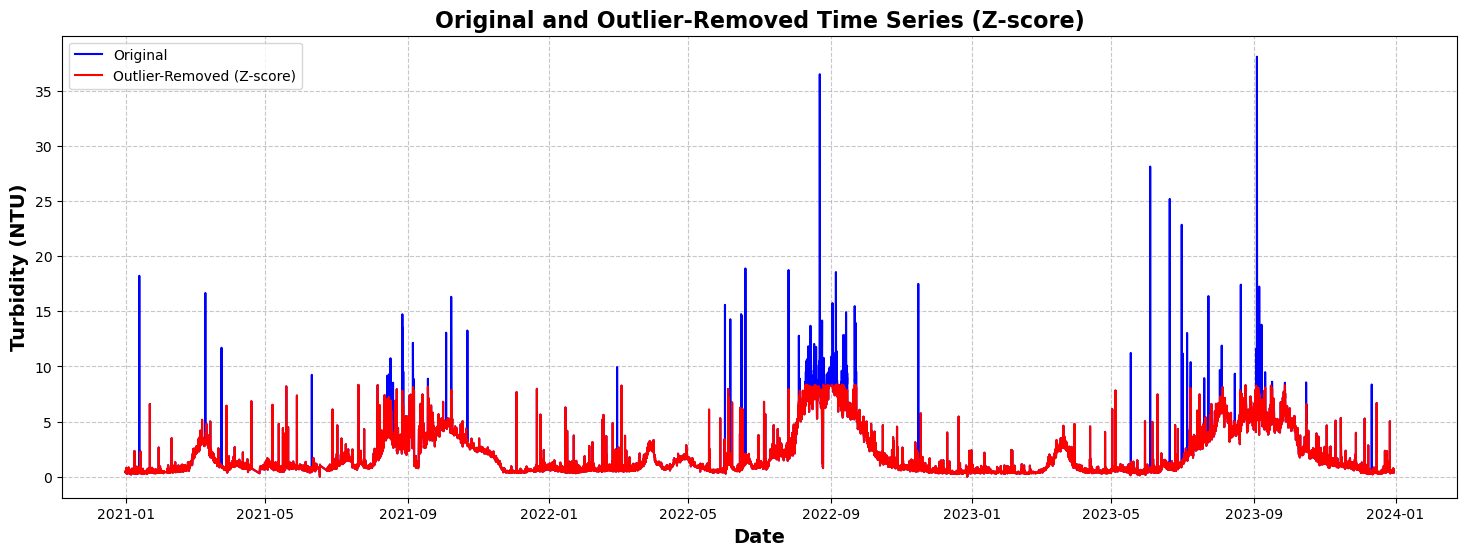

In [70]:
# Remove outliers from the original data using Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(Jianing_FLT['Turbidity'])) # Calculate Z-scores for the data. np.abs() is used to get the absolute values of Z-scores.
Jianing_FLT_no_outliers_z = Jianing_FLT[(z_scores < 3)]  # Keep only the data points with Z-score less than 3. 

# Plot the original and outlier-removed time series using Z-score method
plt.figure(figsize=(18, 6))
plt.plot(Jianing_FLT.index, Jianing_FLT['Turbidity'], label='Original', color='blue')
plt.plot(Jianing_FLT_no_outliers_z.index, Jianing_FLT_no_outliers_z['Turbidity'], label='Outlier-Removed (Z-score)', color='red')
plt.title('Original and Outlier-Removed Time Series (Z-score)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()





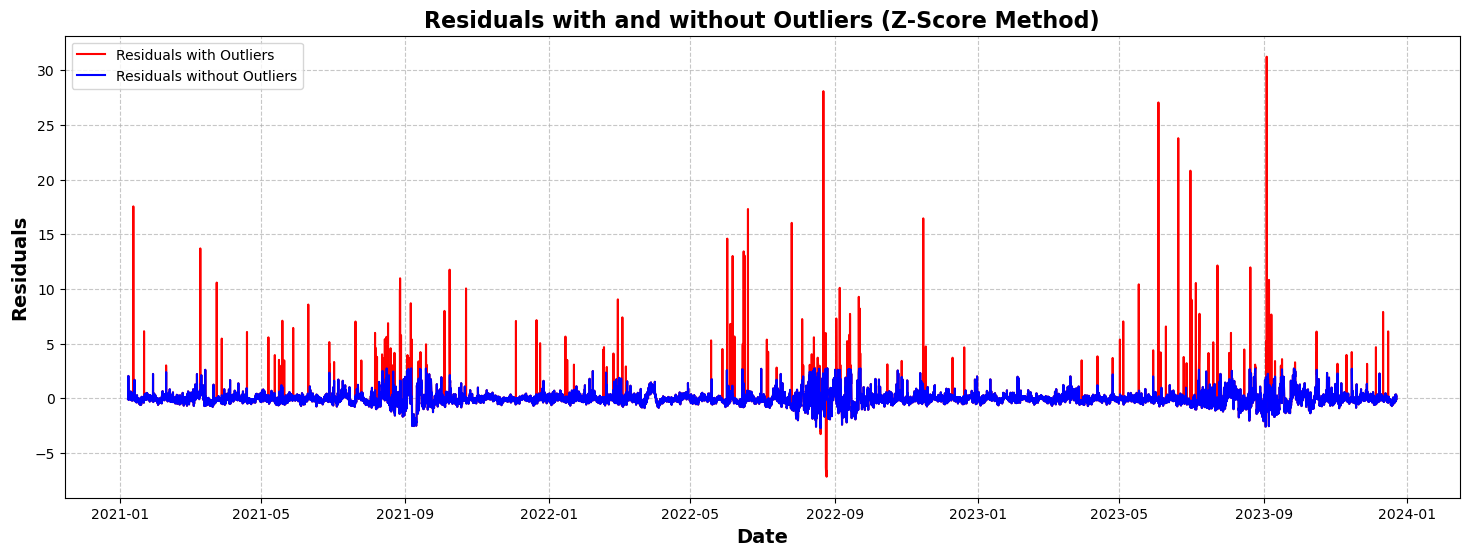

In [71]:
# Remove outliers from the residuals using the z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(decomposition.resid.dropna())) # Calculate Z-scores for the residuals
threshold = 3  # Define the threshold for outliers
outliers = np.where(z_scores > threshold)[0]
residuals_no_outliers_z = decomposition.resid.dropna().copy()
residuals_no_outliers_z.iloc[outliers] = np.nan
residuals_no_outliers_z.interpolate(method='linear', inplace=True)

# Plot the residuals with and without outliers using z-score method
plt.figure(figsize=(18, 6))
plt.plot(decomposition.resid.dropna().index, decomposition.resid.dropna(), label='Residuals with Outliers', color='red')
plt.plot(residuals_no_outliers_z.index, residuals_no_outliers_z, label='Residuals without Outliers', color='blue')
plt.title('Residuals with and without Outliers (Z-Score Method)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Residuals', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



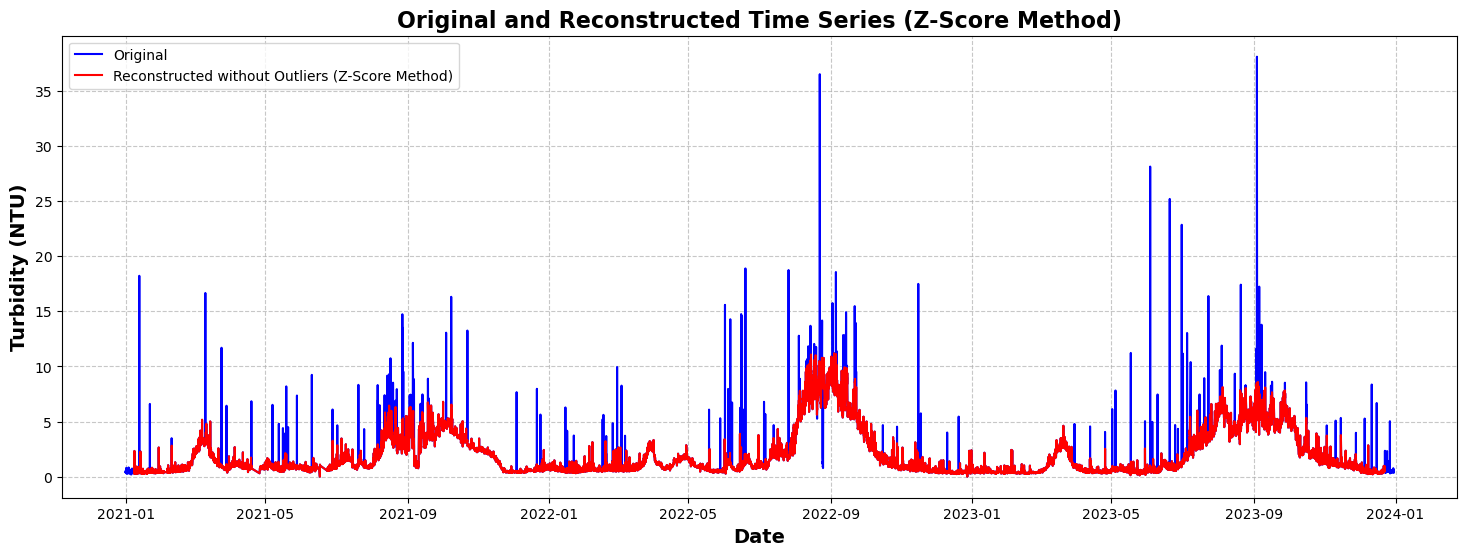

In [73]:
# Reconstruct the time series without outliers using z-score method
Jianing_FLT_no_outliers_z = Jianing_FLT.copy()
Jianing_FLT_no_outliers_z['Turbidity'] = decomposition.trend + decomposition.seasonal + residuals_no_outliers_z.reindex(Jianing_FLT.index, method='ffill')


# Plot the original and reconstructed time series using z-score method
plt.figure(figsize=(18, 6))
plt.plot(Jianing_FLT.index, Jianing_FLT['Turbidity'], label='Original', color='blue')
plt.plot(Jianing_FLT_no_outliers_z.index, Jianing_FLT_no_outliers_z['Turbidity'], label='Reconstructed without Outliers (Z-Score Method)', color='red')
plt.title('Original and Reconstructed Time Series (Z-Score Method)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


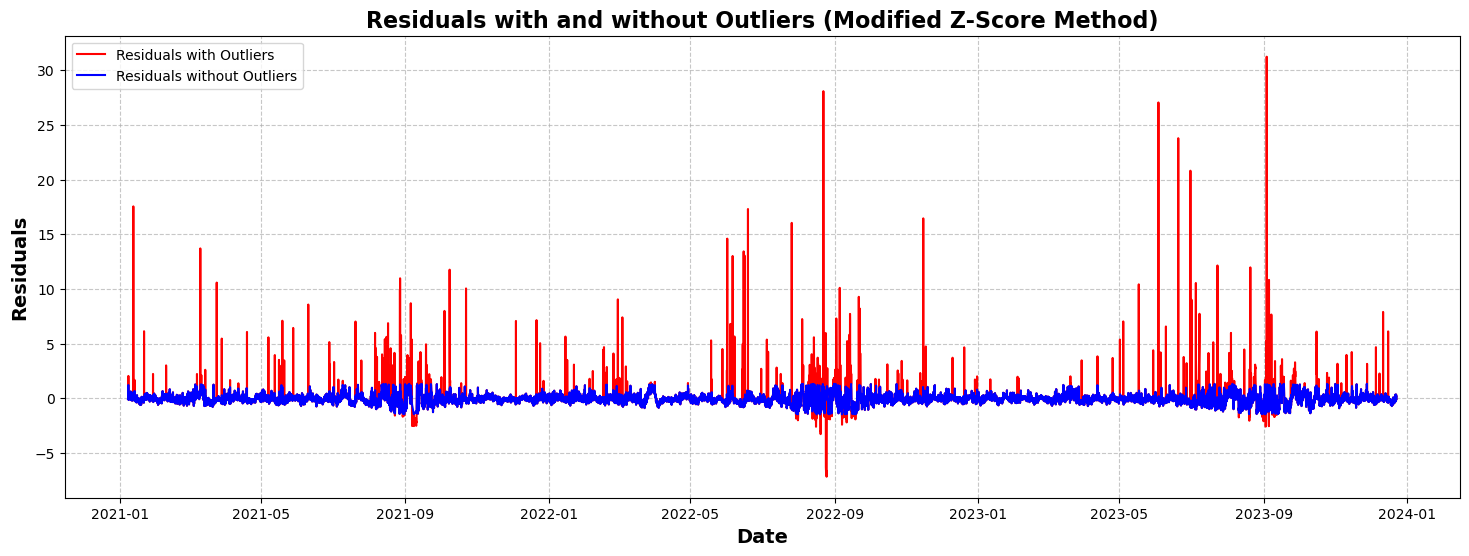

In [74]:
# Remove outliers from the residuals using the modified z-score method
from scipy import stats
from statsmodels import robust

# Calculate the modified z-scores
modified_z_scores = 0.6745 * (decomposition.resid.dropna() - decomposition.resid.dropna().median()) / robust.mad(decomposition.resid.dropna())  
threshold = 3.5  # Define the threshold for outliers


# Identify outliers using modified z-scores 
outliers = np.where(np.abs(modified_z_scores) > threshold)[0] 
residuals_no_outliers_mod_z = decomposition.resid.dropna().copy()
residuals_no_outliers_mod_z.iloc[outliers] = np.nan
residuals_no_outliers_mod_z.interpolate(method='linear', inplace=True)

# Plot the residuals with and without outliers using modified z-score method
plt.figure(figsize=(18, 6))
plt.plot(decomposition.resid.dropna().index, decomposition.resid.dropna(), label='Residuals with Outliers', color='red')
plt.plot(residuals_no_outliers_mod_z.index, residuals_no_outliers_mod_z, label='Residuals without Outliers', color='blue')
plt.title('Residuals with and without Outliers (Modified Z-Score Method)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Residuals', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()




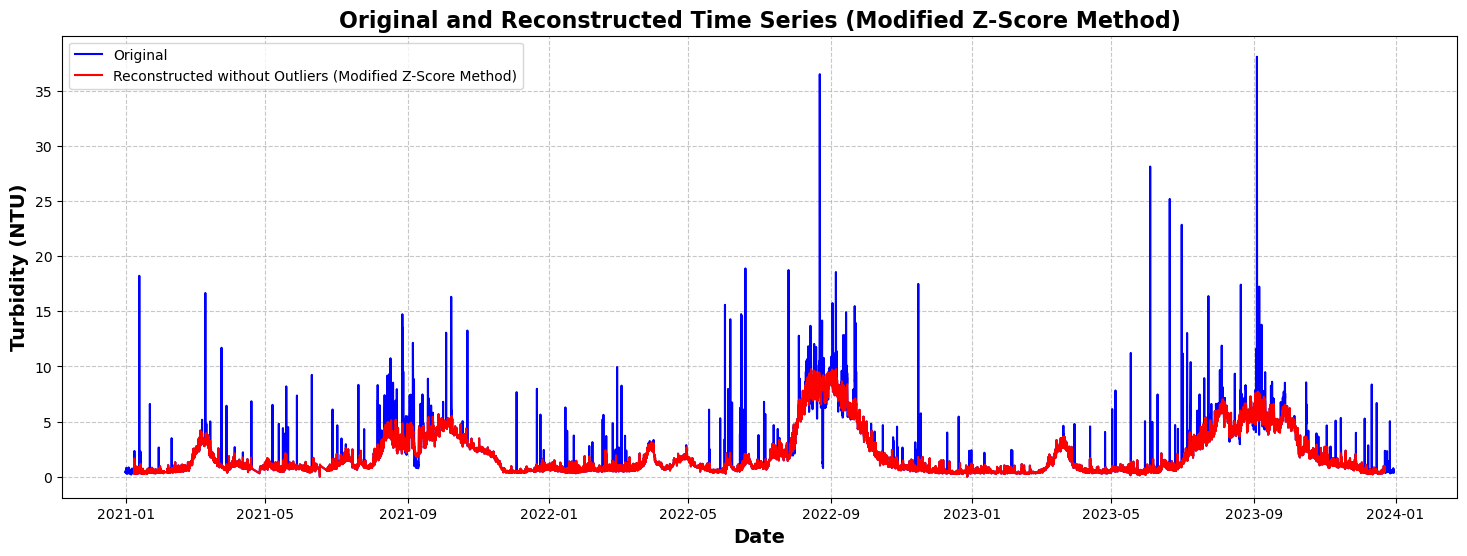

In [75]:
# Reconstruct the time series without outliers using modified z-score method
Jianing_FLT_no_outliers_mod_z = Jianing_FLT.copy()
Jianing_FLT_no_outliers_mod_z['Turbidity'] = decomposition.trend + decomposition.seasonal + residuals_no_outliers_mod_z.reindex(Jianing_FLT.index, method='ffill')

# Plot the original and reconstructed time series using modified z-score method
plt.figure(figsize=(18, 6))
plt.plot(Jianing_FLT.index, Jianing_FLT['Turbidity'], label='Original', color='blue')
plt.plot(Jianing_FLT_no_outliers_mod_z.index, Jianing_FLT_no_outliers_mod_z['Turbidity'], label='Reconstructed without Outliers (Modified Z-Score Method)', color='red')
plt.title('Original and Reconstructed Time Series (Modified Z-Score Method)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


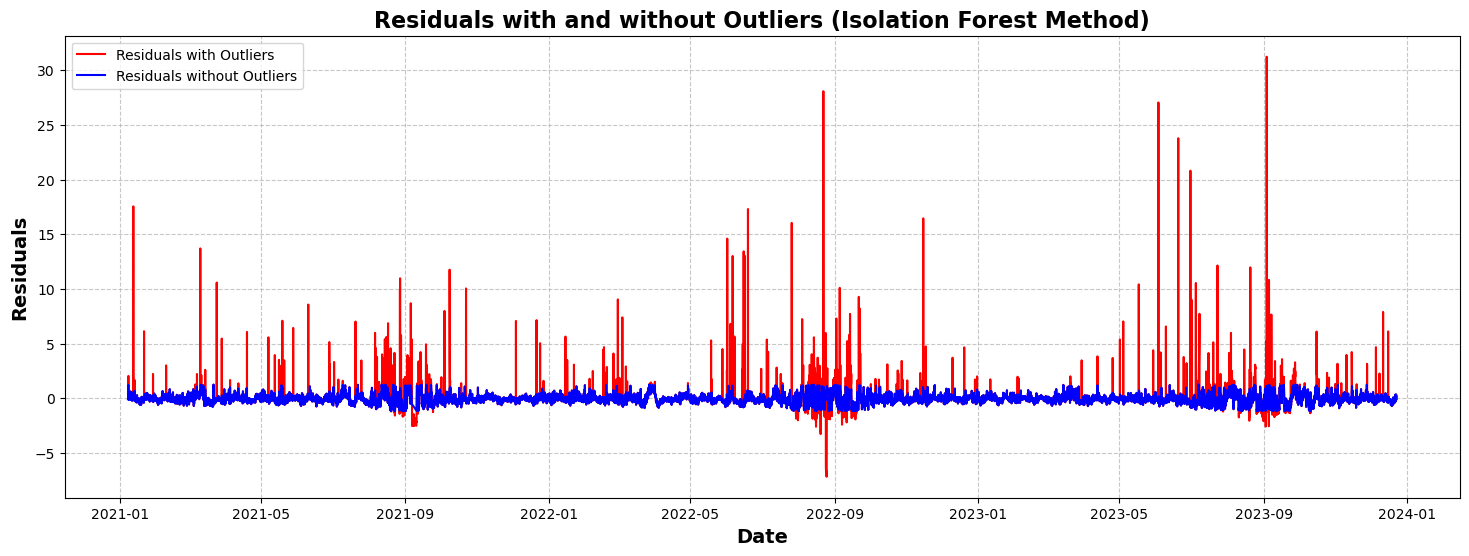

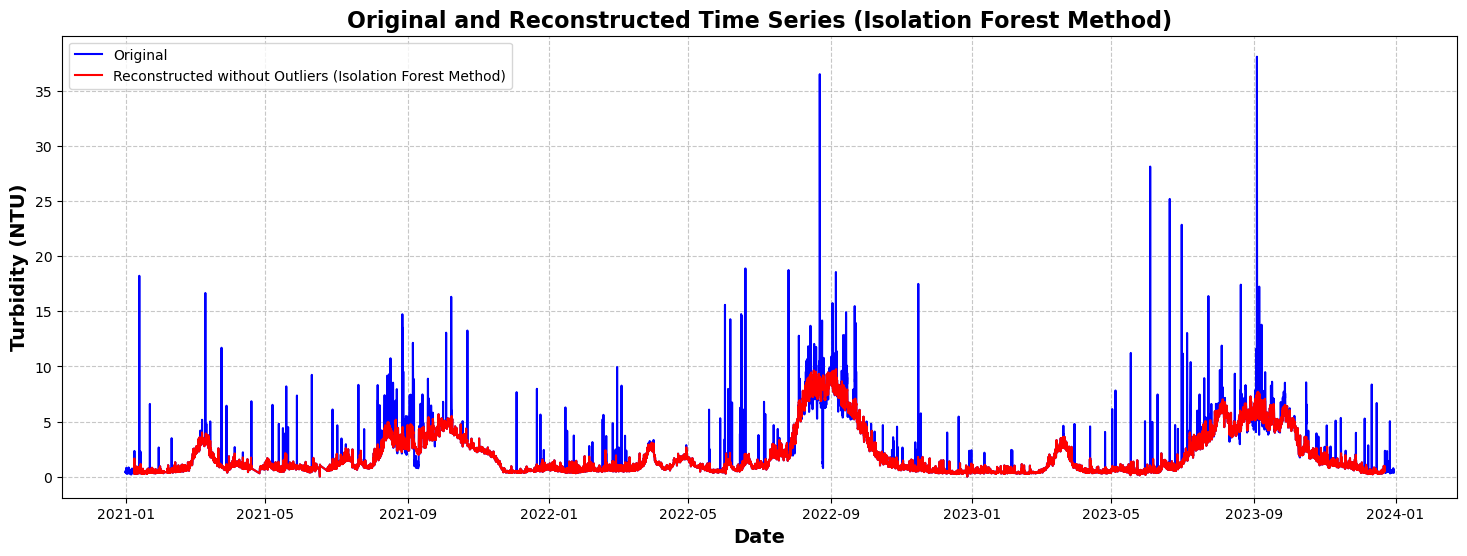

In [77]:
# Remove outliers from the residuals using isolation forest method
from sklearn.ensemble import IsolationForest

# Reshape the data for Isolation Forest 
residuals_reshaped = decomposition.resid.dropna().values.reshape(-1, 1)  # (-1, 1) shape is required for Isolation Forest

# Create an Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # Set contamination to 5%, contamination is the proportion of outliers in the data

# Fit the Isolation Forest model
model.fit(residuals_reshaped)

# Predict outliers
predictions = model.predict(residuals_reshaped)  # -1 indicates outliers, 1 indicates inliers
outliers = np.where(predictions == -1)[0]  # Get the indices of outliers

residuals_no_outliers_if = decomposition.resid.dropna().copy()
residuals_no_outliers_if.iloc[outliers] = np.nan
residuals_no_outliers_if.interpolate(method='linear', inplace=True)

# Plot the residuals with and without outliers using isolation forest method
plt.figure(figsize=(18, 6))
plt.plot(decomposition.resid.dropna().index, decomposition.resid.dropna(), label='Residuals with Outliers', color='red')
plt.plot(residuals_no_outliers_if.index, residuals_no_outliers_if, label='Residuals without Outliers', color='blue')
plt.title('Residuals with and without Outliers (Isolation Forest Method)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Residuals', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Reconstruct the time series without outliers using isolation forest method
Jianing_FLT_no_outliers_if = Jianing_FLT.copy()
Jianing_FLT_no_outliers_if['Turbidity'] = decomposition.trend + decomposition.seasonal + residuals_no_outliers_if.reindex(Jianing_FLT.index, method='ffill')

# Plot the original and reconstructed time series using isolation forest method
plt.figure(figsize=(18, 6))
plt.plot(Jianing_FLT.index, Jianing_FLT['Turbidity'], label='Original', color='blue')
plt.plot(Jianing_FLT_no_outliers_if.index, Jianing_FLT_no_outliers_if['Turbidity'], label='Reconstructed without Outliers (Isolation Forest Method)', color='red')
plt.title('Original and Reconstructed Time Series (Isolation Forest Method)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()




C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_18600\1032796669.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Jianing_FLT_no_outliers_if['Turbidity'].iloc[outliers] = np.nan
C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_18600\1

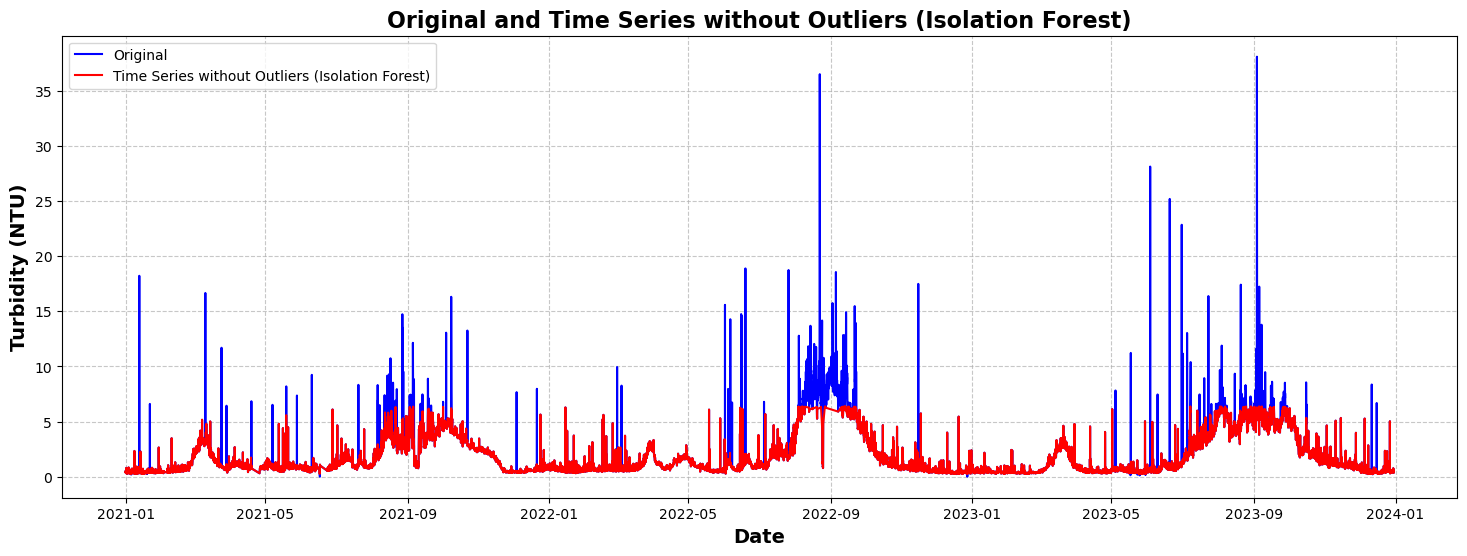

In [78]:
# remove the outliers from the original time series using isolation forest method
from sklearn.ensemble import IsolationForest

# Reshape the data for Isolation Forest
Jianing_FLT_reshaped = Jianing_FLT['Turbidity'].values.reshape(-1, 1)  # (-1, 1) shape is required for Isolation Forest

# Create an Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # Set contamination to 5%, contamination is the proportion of outliers in the data

# Fit the Isolation Forest model
model.fit(Jianing_FLT_reshaped)

# Predict outliers
predictions = model.predict(Jianing_FLT_reshaped)  # -1 indicates outliers, 1 indicates inliers
outliers = np.where(predictions == -1)[0]  # Get the indices of outliers

Jianing_FLT_no_outliers_if = Jianing_FLT.copy()
Jianing_FLT_no_outliers_if['Turbidity'] = Jianing_FLT['Turbidity'].copy()
Jianing_FLT_no_outliers_if['Turbidity'].iloc[outliers] = np.nan
Jianing_FLT_no_outliers_if['Turbidity'].interpolate(method='linear', inplace=True)

# Plot the original time series vs the time series without outliers using isolation forest method
plt.figure(figsize=(18, 6))
plt.plot(Jianing_FLT.index, Jianing_FLT['Turbidity'], label='Original', color='blue')
plt.plot(Jianing_FLT_no_outliers_if.index, Jianing_FLT_no_outliers_if['Turbidity'], label='Time Series without Outliers (Isolation Forest)', color='red')
plt.title('Original and Time Series without Outliers (Isolation Forest)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



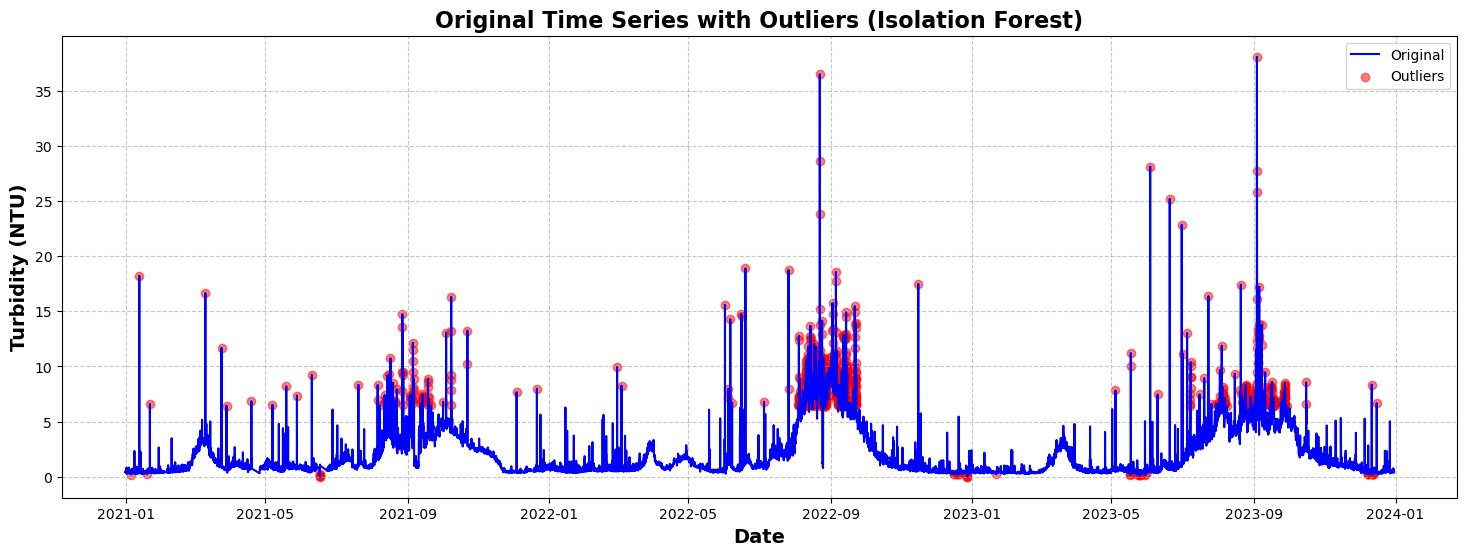

In [89]:
# plot outliers in the original time series using isolation forest method
plt.figure(figsize=(18, 6))
plt.plot(Jianing_FLT.index, Jianing_FLT['Turbidity'], label='Original', color='blue')
plt.scatter(Jianing_FLT.index[outliers], Jianing_FLT['Turbidity'].iloc[outliers], color='red', label='Outliers', alpha=0.5)
plt.title('Original Time Series with Outliers (Isolation Forest)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Historical Mean Baseline model

In [80]:
# Split the data into training and testing sets
df = pd.read_excel('Reconstructed_Turbidity.xlsx')
df.set_index('Date', inplace=True)  # Set the index to the date column
train_size = int(len(df) * 0.8)  # 80% for training
train, test = df[:train_size], df[train_size:]  # Split the data into training and testing sets

In [81]:
print(f'Training set size: {len(train)}')
print(f'Testing set size: {len(test)}')


Training set size: 21000
Testing set size: 5251


In [112]:
train['Reconstructed_Turbidity'].shape, test['Reconstructed_Turbidity'].shape  # Check the shape of the training and testing sets

((21000,), (5251,))

C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_18600\1221677728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions  # Add the predictions to the test data


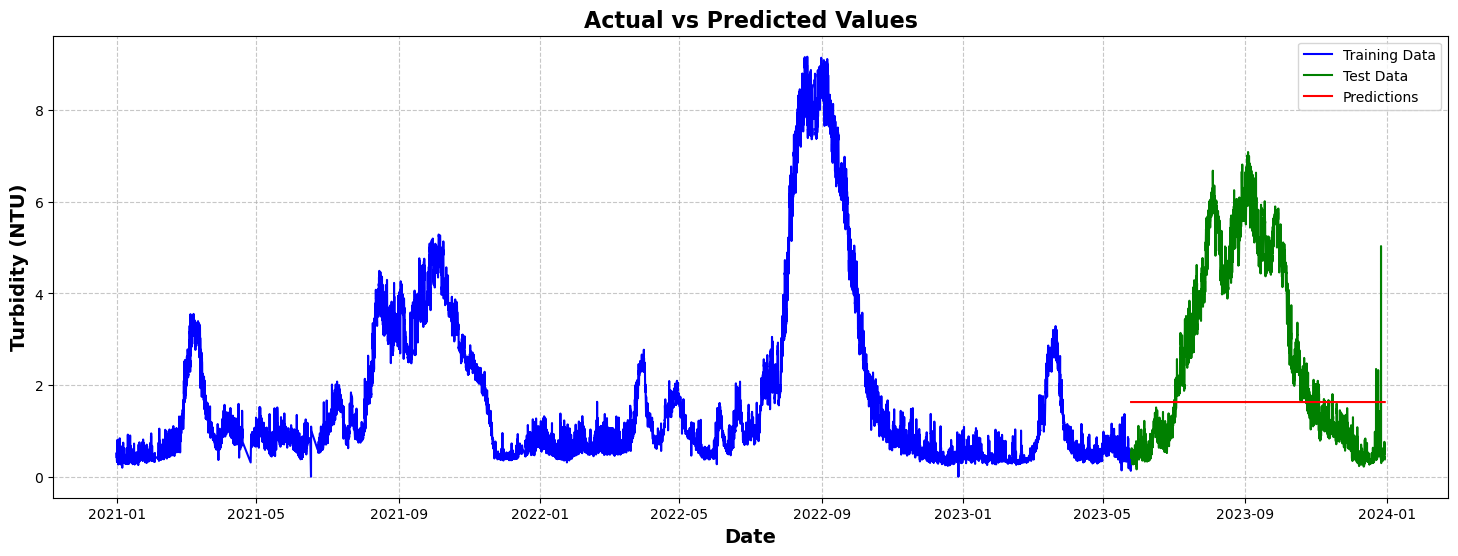

1.6297882158049521


In [114]:
# Use mean of historical train data as predicted value for test data
mean_train = train['Reconstructed_Turbidity'].mean()  # Calculate the mean of the training data
predictions = [mean_train] * len(test)  # Create a list of predictions with the same length as the test data
test['Predictions'] = predictions  # Add the predictions to the test data

# Plot the actual vs predicted values
plt.figure(figsize=(18, 6))
plt.plot(train.index, train['Reconstructed_Turbidity'], label='Training Data', color='blue')
plt.plot(test.index, test['Reconstructed_Turbidity'], label='Test Data', color='green')
plt.plot(test.index, test['Predictions'], label='Predictions', color='red')
plt.title('Actual vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


print(mean_train)

In [116]:
# evaluate the model using RMSE, MAE, and MAPE, r2 score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Calculate RMSE, MAE, MAPE, and R2 score
rmse = np.sqrt(mean_squared_error(test['Reconstructed_Turbidity'], test['Predictions']))
mae = mean_absolute_error(test['Reconstructed_Turbidity'], test['Predictions'])
mape = mean_absolute_percentage_error(test['Reconstructed_Turbidity'], test['Predictions'])
r2 = r2_score(test['Reconstructed_Turbidity'], test['Predictions'])

# Print the evaluation metrics
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}')
print(f'R2 Score: {r2:.2f}')


RMSE: 2.28
MAE: 1.81
MAPE: 1.03
R2 Score: -0.25


In [117]:
df.describe()  # Display the summary statistics of the dataset

,Reconstructed_Turbidity
count,26251.000000
mean,1.835204
std,1.908561
min,0.000000
25%,0.564147
50%,0.927232
75%,2.493671
max,9.165509


# Aggregate to other frequency

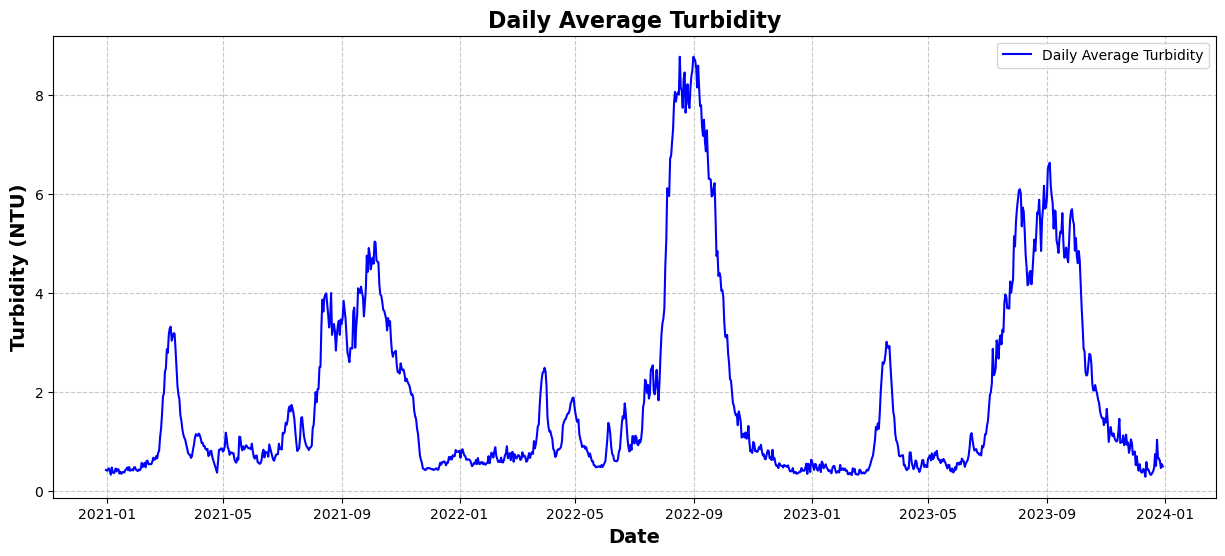

In [101]:
# Aggregate the data to daily frequency
daily_data = df.resample('D').mean()  # Resample the data to daily frequency and calculate the mean
# Plot the daily data
plt.figure(figsize=(15, 6))
plt.plot(daily_data.index, daily_data['Reconstructed_Turbidity'], label='Daily Average Turbidity', color='blue')
plt.title('Daily Average Turbidity', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



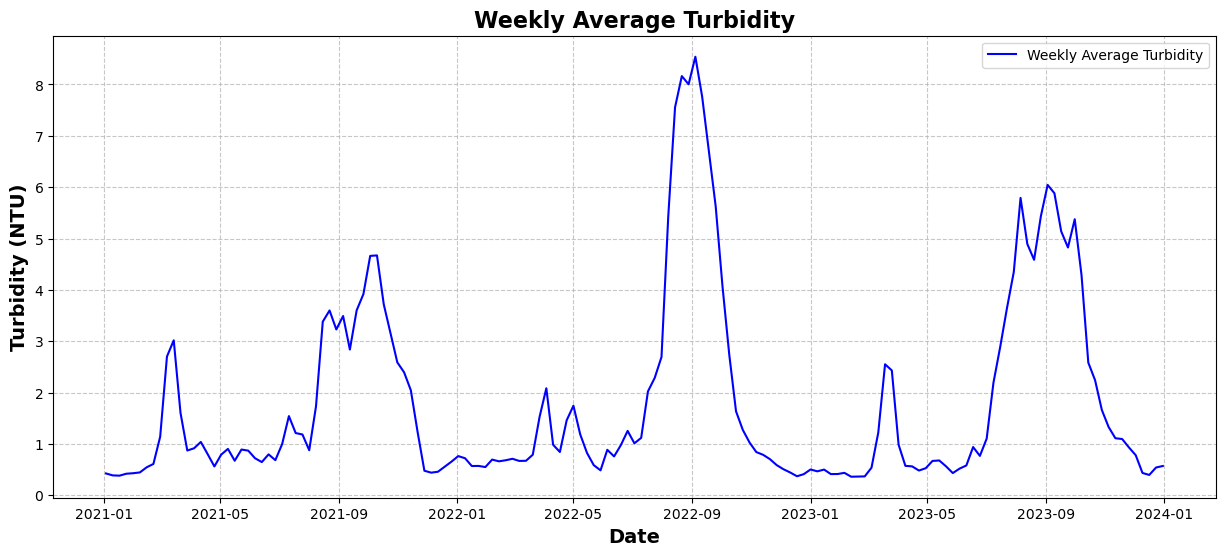

C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_18600\3410183010.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()  # Resample the data to monthly frequency and calculate the mean


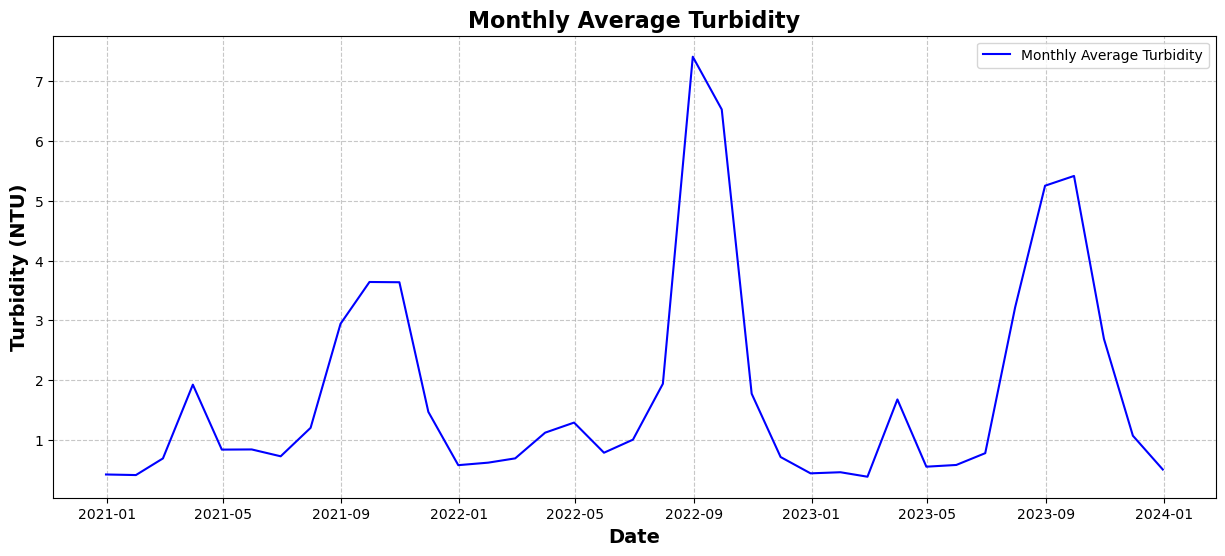

In [103]:
# Resample the data to weekly frequency and calculate the mean
weekly_data = df.resample('W').mean()  # Resample the data to weekly frequency and calculate the mean
# Plot the weekly data
plt.figure(figsize=(15, 6))
plt.plot(weekly_data.index, weekly_data['Reconstructed_Turbidity'], label='Weekly Average Turbidity', color='blue')
plt.title('Weekly Average Turbidity', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Resample the data to monthly frequency and calculate the mean
monthly_data = df.resample('M').mean()  # Resample the data to monthly frequency and calculate the mean
# Plot the monthly data
plt.figure(figsize=(15, 6))
plt.plot(monthly_data.index, monthly_data['Reconstructed_Turbidity'], label='Monthly Average Turbidity', color='blue')
plt.title('Monthly Average Turbidity', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Turbidity (NTU)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Decomposition

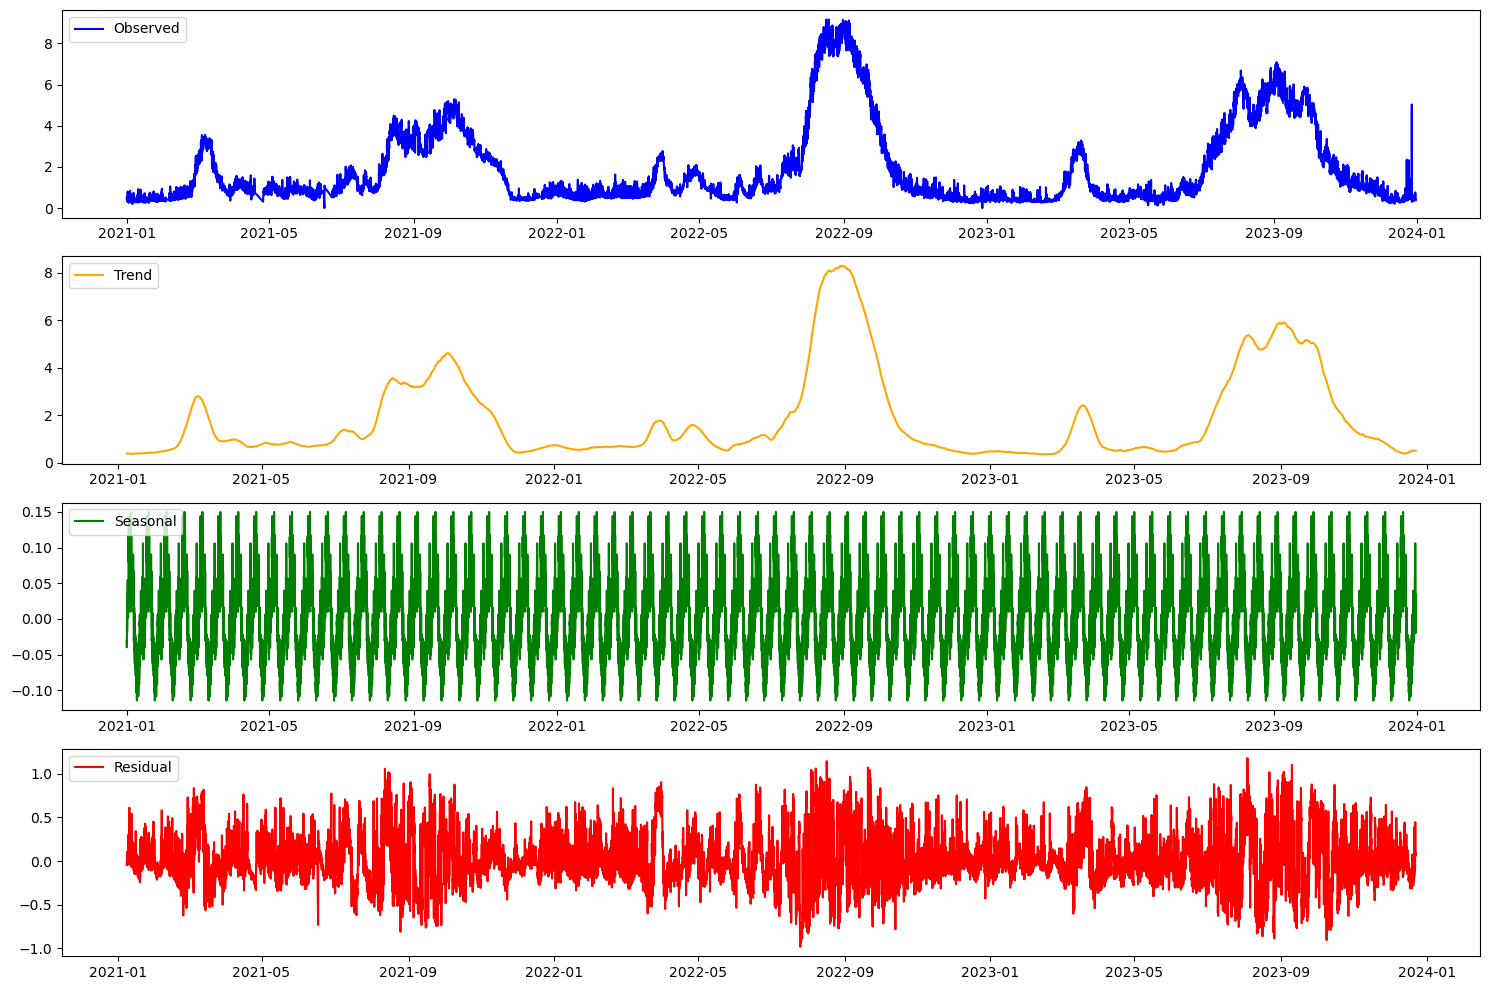

In [105]:
# Decompose the time series using additive model
Reconstructed_Turbidity = pd.read_excel('Reconstructed_Turbidity.xlsx')
Reconstructed_Turbidity.set_index('Date', inplace=True)  # Set the index to the date column
result_add = seasonal_decompose(Reconstructed_Turbidity, model='additive', period=365)
# plot the components of the additive decomposition
plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(result_add.observed, label='Observed', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result_add.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


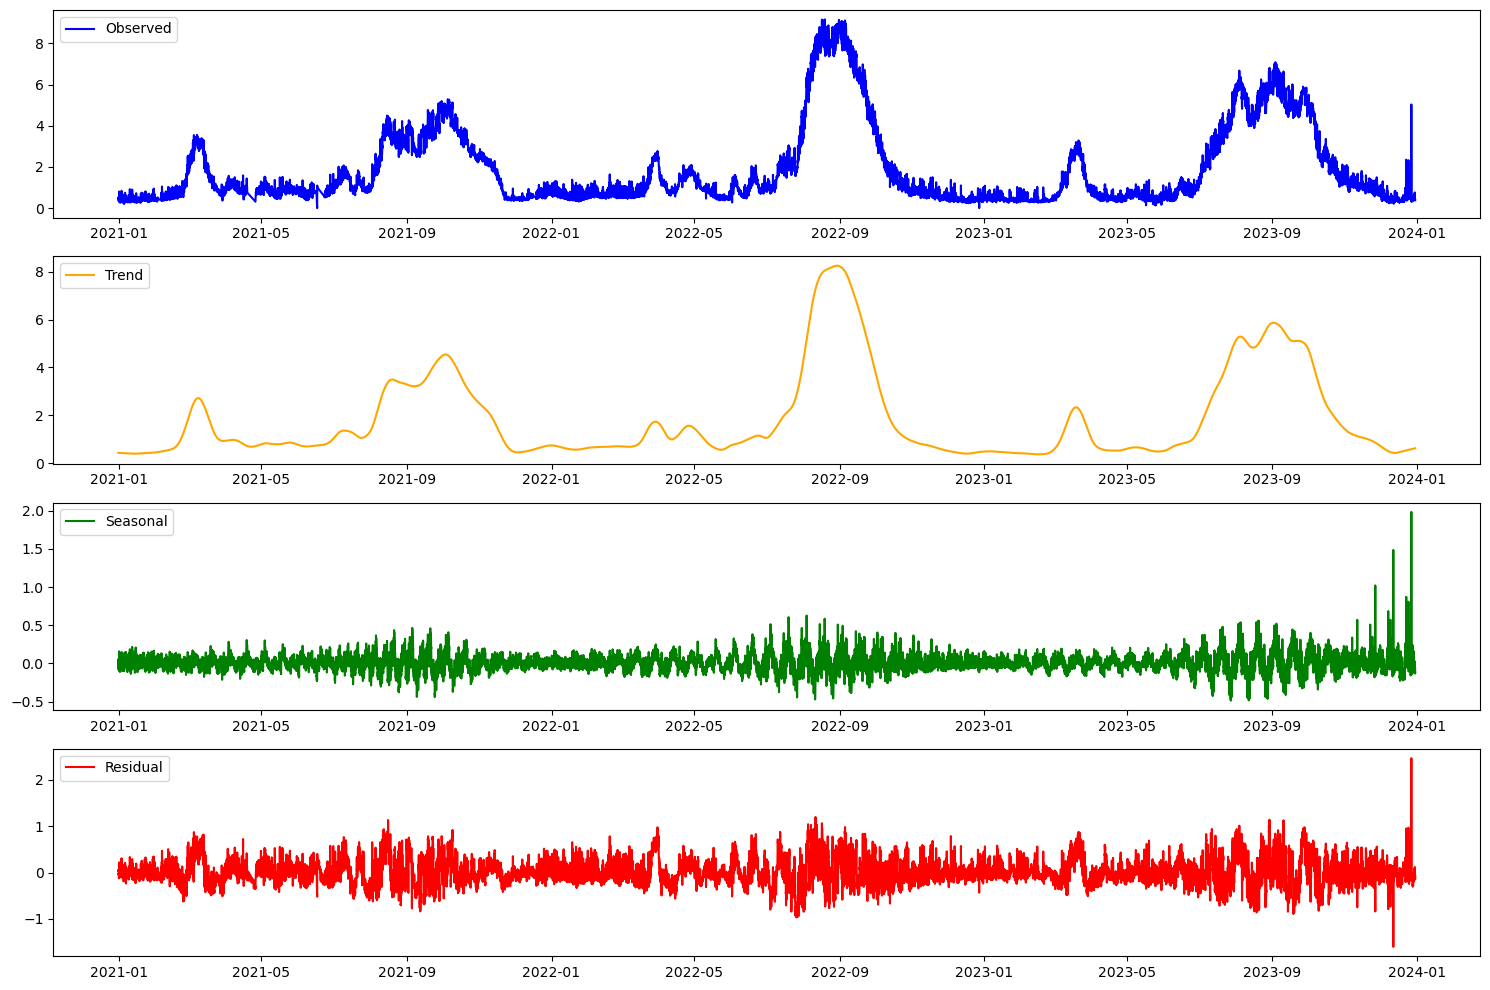

In [108]:
# Decompose the time series using STL method
from statsmodels.tsa.seasonal import seasonal_decompose, STL
stl = STL(Reconstructed_Turbidity, seasonal=11, period=365)
result_stl = stl.fit()
# plot the components of the STL decomposition
plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(result_stl.observed, label='Observed', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result_stl.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result_stl.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result_stl.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
